In [1]:
from sklearn.cluster import KMeans
import numpy as np

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import pandasql as ps
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_excel('D:\MSc_DATA_SCIENCE_MAIN\Case_Study.xlsx')

In [4]:
data = data.fillna(0)

In [5]:
data.head()

,Orgnr,Merchant_id,01_2018,02_2018,03_2018,04_2018,05_2018,06_2018,07_2018,08_2018,...,S_04_2018,S_05_2018,S_06_2018,S_07_2018,S_08_2018,S_09_2018,S_10_2018,S_11_2018,S_12_2018,Sold_2018
0,5020756119,149,6.0,0.0,4.0,4.0,1.0,0.0,4.0,1.0,...,1.0,1.0,0.0,2.0,2.0,3.0,2.0,4.0,1.0,16
1,5020799473,3185,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,5164025073,3000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,5164037490,4311,20.0,9.0,2.0,3.0,10.0,15.0,3.0,6.0,...,0.0,4.0,4.0,4.0,19.0,6.0,17.0,14.0,26.0,176
4,5164044355,1391,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [21]:
# Dont Run
sc = MinMaxScaler()   # making data of same scale
sc.fit(data[['01_2018','02_2018','03_2018','04_2018',
             '05_2018','06_2018','07_2018','08_2018',
             '09_2018','10_2018','11_2018','12_2018','Bought_2018',
             'S_01_2018','S_02_2018','S_03_2018','S_04_2018',
             'S_05_2018','S_06_2018','S_07_2018','S_08_2018',
             'S_09_2018','S_10_2018','S_11_2018','S_12_2018','Sold_2018']])
data[['Merchant_id','01_2018','02_2018','03_2018','04_2018',
             '05_2018','06_2018','07_2018','08_2018',
             '09_2018','10_2018','11_2018','12_2018','Bought_2018',
             'S_01_2018','S_02_2018','S_03_2018','S_04_2018',
             'S_05_2018','S_06_2018','S_07_2018','S_08_2018',
             'S_09_2018','S_10_2018','S_11_2018','S_12_2018','Sold_2018']] = sc.transform(data[[
             '01_2018','02_2018','03_2018','04_2018',
             '05_2018','06_2018','07_2018','08_2018',
             '09_2018','10_2018','11_2018','12_2018','Bought_2018',
             'S_01_2018','S_02_2018','S_03_2018','S_04_2018',
             'S_05_2018','S_06_2018','S_07_2018','S_08_2018',
             'S_09_2018','S_10_2018','S_11_2018','S_12_2018','Sold_2018']])

In [6]:
# Verifying it
X = data[['Merchant_id','Bought_2018']]  # check using both Bought_2018 and Sold_2018

# Bought_2018 gives 4 clusters
# Sold_2018 gives 4 clusters

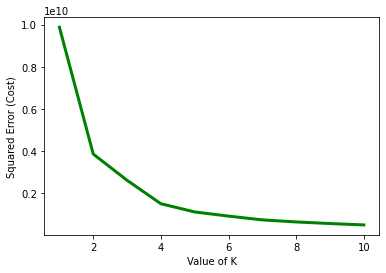

In [7]:
cost =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(X)
     
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)    
 
# plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans

KMeans(n_clusters=4, random_state=0)

In [9]:
data['difference'] = data['Bought_2018'] - data['Sold_2018']

In [10]:
y_predict_Bought = kmeans.fit_predict(data[['01_2018','02_2018','03_2018','04_2018',
                                     '05_2018','06_2018','07_2018','08_2018',
                                     '09_2018','10_2018','11_2018','12_2018','Bought_2018','difference']])

In [11]:
y_predict_Bought

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
y_predict_Sold = kmeans.fit_predict(data[['S_01_2018','S_02_2018','S_03_2018','S_04_2018',
                                     'S_05_2018','S_06_2018','S_07_2018','S_08_2018',
                                     'S_09_2018','S_10_2018','S_11_2018','S_12_2018','Sold_2018','difference']])

In [13]:
y_predict_Sold

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
data['bought_cluster'] = y_predict_Bought
data['Sold_cluster'] = y_predict_Sold

0    4054
2     478
3      46
1       5
Name: bought_cluster, dtype: int64

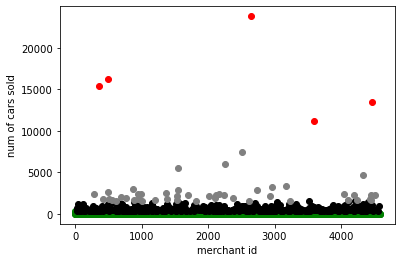

In [19]:
# seprate data frames for clustering

data_B1 = data[data.bought_cluster == 0]  # green
data_B2 = data[data.bought_cluster == 1]  # red
data_B3 = data[data.bought_cluster == 2]  # black
data_B4 = data[data.bought_cluster == 3]  # gray

# plot all data frames on one scatter plot

plt.scatter(data_B1.Merchant_id, data_B1['Bought_2018'], color = 'green')
plt.scatter(data_B2.Merchant_id, data_B2['Bought_2018'], color = 'red')
plt.scatter(data_B3.Merchant_id, data_B3['Bought_2018'], color = 'black')
plt.scatter(data_B4.Merchant_id, data_B4['Bought_2018'], color = 'gray')
plt.xlabel('merchant id')
plt.ylabel('num of cars sold')

data.bought_cluster.value_counts() # unique values

0    4410
2     164
3       6
1       3
Name: Sold_cluster, dtype: int64

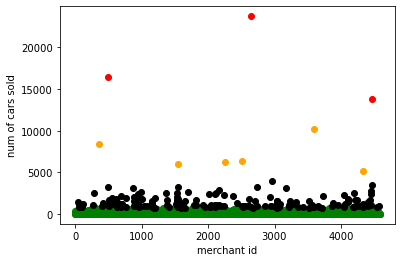

In [17]:
# seprate data frames for clustering

data_S1 = data[data.Sold_cluster == 0] # green
data_S2 = data[data.Sold_cluster == 1] # red
data_S3 = data[data.Sold_cluster == 2] # black
data_S4 = data[data.Sold_cluster == 3] # orange

# plot all data frames on one scatter plot

plt.scatter(data_S1.Merchant_id, data_S1['Sold_2018'], color = 'green')
plt.scatter(data_S2.Merchant_id, data_S2['Sold_2018'], color = 'red')
plt.scatter(data_S3.Merchant_id, data_S3['Sold_2018'], color = 'black')
plt.scatter(data_S4.Merchant_id, data_S4['Sold_2018'], color = 'orange')
plt.xlabel('merchant id')
plt.ylabel('num of cars sold')

data.Sold_cluster.value_counts() # unique values

In [52]:
 #for idea of current year Bought - Sold

In [21]:
data.head()

,Orgnr,Merchant_id,01_2018,02_2018,03_2018,04_2018,05_2018,06_2018,07_2018,08_2018,...,S_07_2018,S_08_2018,S_09_2018,S_10_2018,S_11_2018,S_12_2018,Sold_2018,difference,bought_cluster,Sold_cluster
0,5020756119,149,6.0,0.0,4.0,4.0,1.0,0.0,4.0,1.0,...,2.0,2.0,3.0,2.0,4.0,1.0,16,17,0,0
1,5020799473,3185,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
2,5164025073,3000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,5164037490,4311,20.0,9.0,2.0,3.0,10.0,15.0,3.0,6.0,...,4.0,19.0,6.0,17.0,14.0,26.0,176,-46,0,0
4,5164044355,1391,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0


In [59]:
Bq1 = " select * from data where bought_cluster = '0' "
Bq2 = " select * from data where bought_cluster = '1' "
Bq3 = " select * from data where bought_cluster = '2' "
Bq4 = " select * from data where bought_cluster = '3' "

B1 = pd.DataFrame(ps.sqldf(Bq1,locals())) # run query to get 
B2 = pd.DataFrame(ps.sqldf(Bq2,locals()))
B3 = pd.DataFrame(ps.sqldf(Bq3,locals()))
B4 = pd.DataFrame(ps.sqldf(Bq4,locals()))

# confirm query executed 
# B1['bought_cluster'].value_counts()

In [60]:
Sq1 = " select * from data where Sold_cluster = '0' "
Sq2 = " select * from data where Sold_cluster = '1' "
Sq3 = " select * from data where Sold_cluster = '2' "
Sq4 = " select * from data where Sold_cluster = '3' "

S1 = pd.DataFrame(ps.sqldf(Bq1,locals())) # run query to get 
S2 = pd.DataFrame(ps.sqldf(Bq2,locals()))
S3 = pd.DataFrame(ps.sqldf(Bq3,locals()))
S4 = pd.DataFrame(ps.sqldf(Bq4,locals()))

In [28]:
# clustering complete no generating forecast for purchase and sell for next year.

In [40]:
B1.head()

,Orgnr,Merchant_id,01_2018,02_2018,03_2018,04_2018,05_2018,06_2018,07_2018,08_2018,...,S_07_2018,S_08_2018,S_09_2018,S_10_2018,S_11_2018,S_12_2018,Sold_2018,difference,bought_cluster,Sold_cluster
0,5020756119,149,6.0,0.0,4.0,4.0,1.0,0.0,4.0,1.0,...,2.0,2.0,3.0,2.0,4.0,1.0,16,17,0,0
1,5020799473,3185,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
2,5164025073,3000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,5164037490,4311,20.0,9.0,2.0,3.0,10.0,15.0,3.0,6.0,...,4.0,19.0,6.0,17.0,14.0,26.0,176,-46,0,0
4,5164044355,1391,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0


In [ ]:
# extract data post this using to csv function of pandas